<a href="https://colab.research.google.com/github/Sindhuhar/practice_computer_vision/blob/main/10_opencv_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Thresholding ( cv2.threshold )

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving openCV.png to openCV.png


In [5]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

args = {
    "image" : "openCV.png"
}

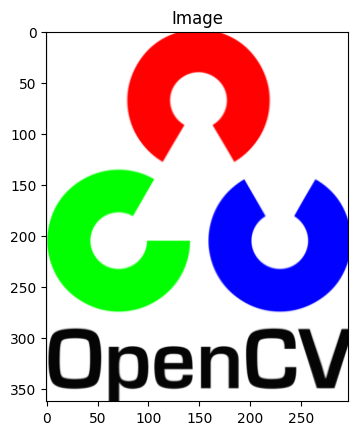

In [6]:
# load the image and display it

image = cv2.imread(args["image"])
plt_imshow("Image",image)

In [7]:
# convert the image to grayscale and blur it slightly

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7,7),0)

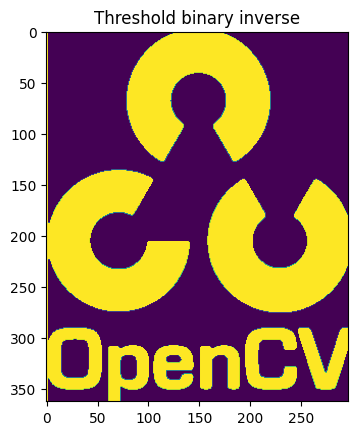

In [8]:
# apply basic thresholding -- the first parameter is the image
# we want to threshold, the second value is is our threshold
# check; if a pixel value is greater than our threshold (in this
# case, 200), we set it to be *black, otherwise it is *white*

(T, threshInv) = cv2.threshold(blurred,200,255,cv2.THRESH_BINARY_INV)
plt_imshow("Threshold binary inverse",threshInv)

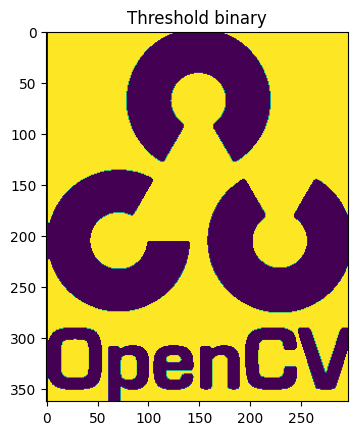

In [9]:
# using normal thresholding (rather than inverse thresholding)

(T, thresh) = cv2.threshold(blurred,200,255,cv2.THRESH_BINARY)
plt_imshow("Threshold binary",thresh)

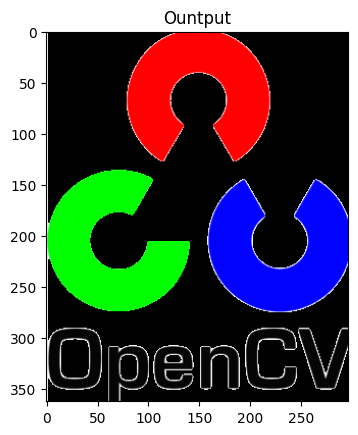

In [10]:
# visualize only the masked regions in the image

masked = cv2.bitwise_and(image, image, mask = threshInv)
plt_imshow("Ountput", masked)

### Implementing Otsu thresholding with OpenCV

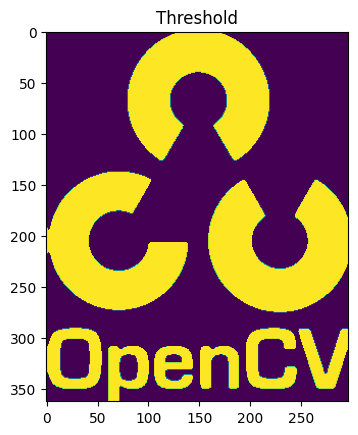

[INFO] otsu's thresholding value: 164.0


In [11]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value

(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Threshold", threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))

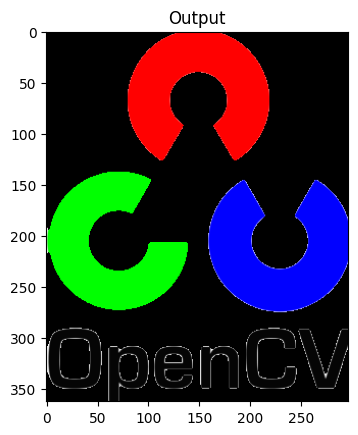

In [12]:
# visualize only the masked regions in the image

masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output",masked)

# Adaptive Thresholding with OpenCV ( cv2.adaptiveThreshold )

In [20]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [13]:
from google.colab import files
uploaded = files.upload()

Saving job1.png to job1.png


In [21]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

args = {
    "image" : "job1.png"
}

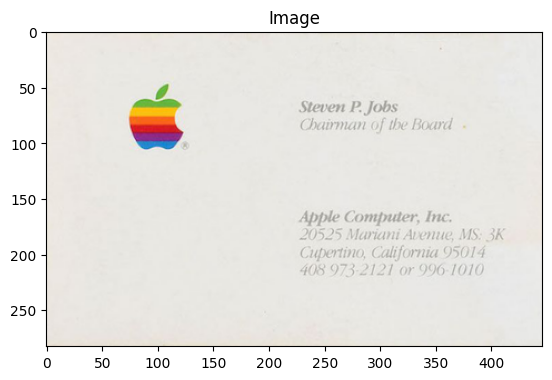

In [22]:
# load the image and display it

image = cv2.imread(args["image"])
plt_imshow("Image",image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7,7),0)

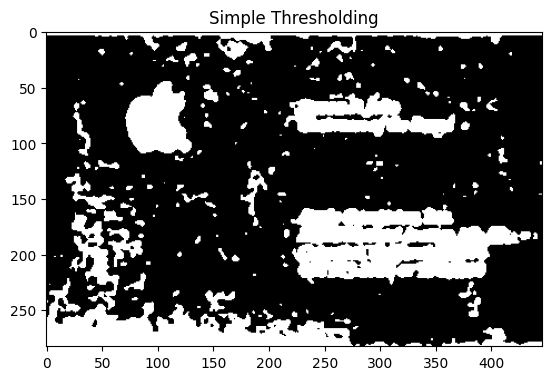

In [23]:
# apply simple thresholding with a hardcoded threshold value

(T, threshInv) = cv2.threshold(blurred, 230,255, cv2.THRESH_BINARY_INV)
plt_imshow("Simple Thresholding",threshInv)

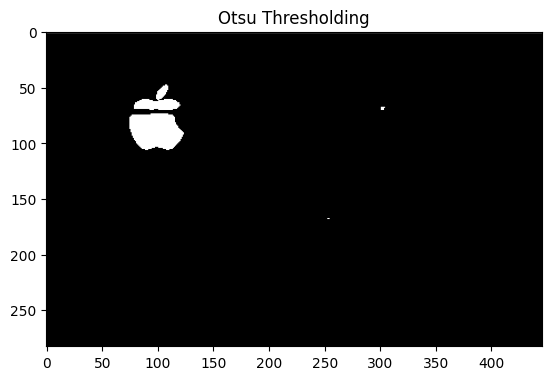

In [24]:
# apply Otsu's automatic thresholding

(T, threshInv) = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Otsu Thresholding", threshInv)

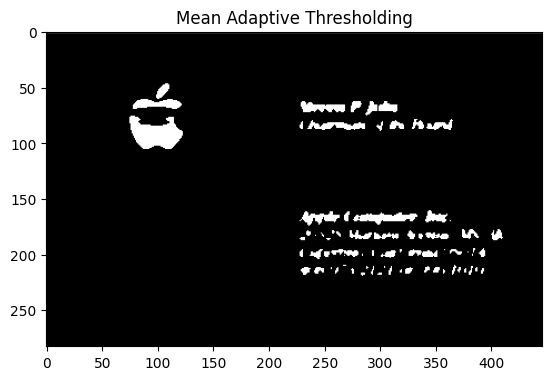

In [26]:
# instead of manually specifying the threshold value, we can use
# adaptive thresholding to examine neighborhoods of pixels and
# adaptively threshold each neighborhood

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
plt_imshow("Mean Adaptive Thresholding", thresh)

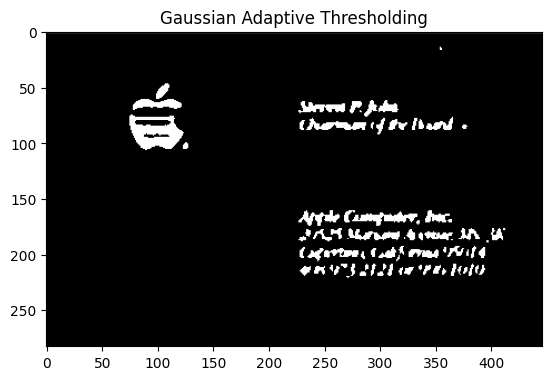

In [27]:
# perform adaptive thresholding again, this time using a Gaussian
# weighting versus a simple mean to compute our local threshold
# value

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,21,4)
plt_imshow("Gaussian Adaptive Thresholding",thresh)